In [77]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

In [78]:
train = pd.read_csv("train.csv")

test = pd.read_csv("test.csv")

In [79]:

train.describe()

,writer_count,comments,likes,overall_views,dislikes,special_award,awards_win,awards_nomination
count,2306.000000,1974.000000,1956.000000,2.083000e+03,1956.000000,2400.000000,2400.000000,2400.000000
mean,2.596271,546.438197,3113.894172,1.345472e+06,232.665644,0.185417,6.582917,12.698333
std,2.011586,2103.833164,10213.600411,4.030918e+06,946.288417,0.388716,16.089857,24.925965
min,1.000000,0.000000,0.000000,2.100000e+01,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,99.000000,6.752950e+04,7.000000,0.000000,0.000000,1.000000
50%,2.000000,57.000000,425.000000,2.816520e+05,30.000000,0.000000,2.000000,5.000000
75%,3.000000,289.000000,1819.000000,9.855095e+05,121.250000,0.000000,6.000000,12.000000
max,28.000000,44644.000000,188526.000000,1.071502e+08,29267.000000,1.000000,235.000000,326.000000


In [80]:
train.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination,revenue_category
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,...,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1,High
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,...,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92,Low
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,24-Sep-04,140 min,15-Feb-05,...,614.0,351123.0,18.0,8.1/10,80%,64/100,0,12,7,Low
3,"Book of Eli, The",USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,15-Jan-10,118 min,15-Jun-10,...,NaN,NaN,NaN,6.9/10,47%,53/100,0,3,16,High
4,Blind Dating,USA,"Comedy, Romance",English,1.0,False,PG-13,26-Apr-07,95 min,05-Feb-08,...,693.0,970306.0,36.0,6.1/10,25%,0,0,0,0,Low


### Feature, Label split for the training set

We split the training data column wise into two vectors, one for the features and the other for labels


In [81]:
features = train[test.columns]  # So we don't train on data that would'nt be available in the test set or real world
labels = train.revenue_category


In [82]:
features.head()

,title,country,genres,language,writer_count,title_adaption,censor_rating,release_date,runtime,dvd_release_date,...,comments,likes,overall_views,dislikes,ratings_imdb,ratings_tomatoes,ratings_metacritic,special_award,awards_win,awards_nomination
0,Pooh's Heffalump Movie,USA,"Animation, Comedy, Family, Fantasy, Musical, M...",English,3.0,True,G,11-Feb-05,68 min,24-May-05,...,NaN,NaN,NaN,NaN,6.4/10,80%,64/100,0,0,1
1,Yeh Jawaani Hai Deewani,India,"Comedy, Drama, Musical, Romance","Hindi, English, French",2.0,True,Not Rated,31-May-13,160 min,15-Jul-13,...,9.0,124.0,127528.0,12.0,7.1/10,67%,0,0,22,92
2,Tae Guk Gi: The Brotherhood of War,South Korea,"Action, Drama, War",Korean,4.0,False,R,24-Sep-04,140 min,15-Feb-05,...,268.0,614.0,351123.0,18.0,8.1/10,80%,64/100,0,12,7
3,"Book of Eli, The",USA,"Action, Adventure, Drama, Thriller",English,1.0,False,R,15-Jan-10,118 min,15-Jun-10,...,NaN,NaN,NaN,NaN,6.9/10,47%,53/100,0,3,16
4,Blind Dating,USA,"Comedy, Romance",English,1.0,False,PG-13,26-Apr-07,95 min,05-Feb-08,...,116.0,693.0,970306.0,36.0,6.1/10,25%,0,0,0,0


### Converting Stringified numerical values to numerical values

If we look closely, columns like `rating_metacritic` and `runtime` are actually numerical, but in string format with some special formatting. To make the most of our dataset, we've got to fix that

In [83]:


def process_data(features):
    # Fixing runtime 
    features.runtime = features.runtime.str.replace(' min', '').astype(float)

    features.ratings_tomatoes = features.ratings_tomatoes.str.replace("%", "").astype(float)

    features.users_votes = features.users_votes.str.replace(',', '').astype(float)


    features.ratings_imdb = features.ratings_imdb.str.replace('/10', '').astype(float)

    features.ratings_metacritic = features.ratings_metacritic.str.replace('/100', '').astype(float)
    
    return features


features = process_data(features)

/tmp/ipykernel_12802/573815696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.runtime = features.runtime.str.replace(' min', '').astype(float)
/tmp/ipykernel_12802/573815696.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.ratings_tomatoes = features.ratings_tomatoes.str.replace("%", "").astype(float)
/tmp/ipykernel_12802/573815696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

### Filling up missing values in the feature set.

- for the numerical columns, we replace the NaN values with the mean of the column. That way, it would'nt affect the mean of the numerical columns



In [84]:
numerical_columns = [col for col in features.columns if features[col].dtype in (np.int64, np.float64)]

filled = features[numerical_columns].fillna(features[numerical_columns].mean())

features[numerical_columns] = filled

/tmp/ipykernel_12802/1395128293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numerical_columns] = filled


## Data Analysis and Visualisations


### Plot the distribution of the censor ratings

Plotting the distribution of the release ratings can help us understand the distribution of the movies in our data with respect to their release ratings. This information can be useful in predicting the revenue category of a movie as high or low, as the release rating of a movie can be one of the factors that affects its revenue.

For example, if we observe that most of the movies in our data are rated R, then it might indicate that R-rated movies have a higher probability of generating more revenue compared to other release ratings. On the other hand, if we observe that most of the movies are rated PG, then it might indicate that PG-rated movies have a lower probability of generating more revenue.

In addition to the release ratings, we can also analyze other variables, such as the movie genres, runtime, IMDB ratings, etc., and combine the information to build a model that can predict the revenue category of a movie.

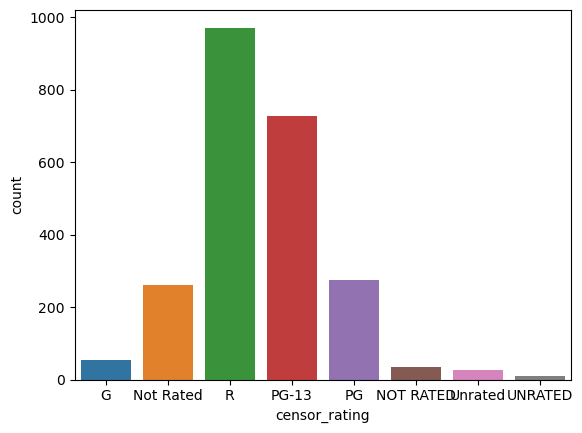

In [85]:
# Plot the distribution of the censor ratings
sns.countplot(x="censor_rating", data=features)
plt.show()


### Plot the distribution of the movie runtime

Plotting the distribution of the movie runtime can help us understand the distribution of the length of movies in our data. This information can be useful in predicting the revenue category of a movie as high or low, as the runtime of a movie can be one of the factors that affects its revenue.

For example, if we observe that most of the movies in our data have a runtime of around 2 hours, then it might indicate that movies with a runtime of around 2 hours have a higher probability of generating more revenue compared to movies with a shorter or longer runtime. On the other hand, if we observe that most of the movies have a runtime of around 1 hour, then it might indicate that movies with a shorter runtime have a lower probability of generating more revenue.

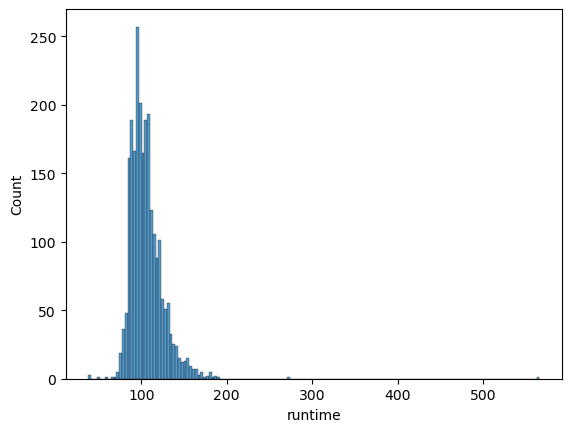

In [86]:

# Plot the distribution of the movie runtime
sns.histplot(x="runtime", data=features)
plt.show()

### Plot the relationship between release rating and movie runtime

Plotting the relationship between the censor rating and movie runtime can help us understand if there is any correlation between these two variables. This information can be useful in predicting the revenue category of a movie as high or low, as both the censor rating and the runtime of a movie can be factors that affect its revenue.

For example, if we observe that movies with a longer runtime tend to have a higher censor rating (e.g. R), then it might indicate that movies with a longer runtime have a higher probability of generating more revenue compared to movies with a shorter runtime. On the other hand, if we observe that movies with a shorter runtime tend to have a higher censor rating, then it might indicate that movies with a shorter runtime have a lower probability of generating more revenue.

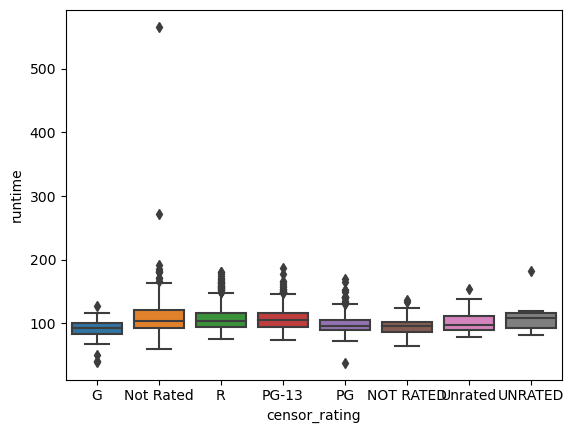

In [87]:

# Plot the relationship between censor rating and movie runtime
sns.boxplot(x="censor_rating", y="runtime", data=features)

plt.show()

### Plot the relationship between the number of awards nominations and IMDB rating

Plotting the relationship between the number of awards nominations and the IMDB rating can help us understand if there is any correlation between these two variables. This information can be useful in predicting the revenue category of a movie as high or low, as both the IMDB rating and the number of awards nominations can be factors that affect its revenue.

For example, if we observe that movies with a higher IMDB rating tend to have more awards nominations, then it might indicate that movies with a higher IMDB rating have a higher probability of generating more revenue compared to movies with a lower IMDB rating. On the other hand, if we observe that movies with a lower IMDB rating tend to have more awards nominations, then it might indicate that movies with a lower IMDB rating have a lower probability of generating more revenue.

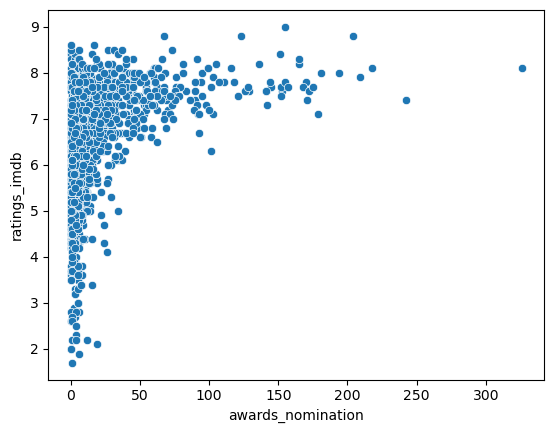

In [88]:

# Plot the relationship between the number of awards nominations and IMDB rating
# sns.jointplot(x="ratings_imdb", y="awards_nomination", data=features)
sns.scatterplot(x="awards_nomination", y="ratings_imdb", data=features)
plt.show()


### Plot the relationship between the number of awards nominations and Rotten Tomatoes rating

The relationship between the number of awards nominations and the Rotten Tomatoes rating can help us understand if there is any correlation between these two variables. This information can be useful in predicting the revenue category of a movie as high or low, as both the Rotten Tomatoes rating and the number of awards nominations can be factors that affect its revenue.

For example, if we observe that movies with a higher Rotten Tomatoes rating tend to have more awards nominations, then it might indicate that movies with a higher Rotten Tomatoes rating have a higher probability of generating more revenue compared to movies with a lower Rotten Tomatoes rating. On the other hand, if we observe that movies with a lower Rotten Tomatoes rating tend to have more awards nominations, then it might indicate that movies with a lower Rotten Tomatoes rating have a lower probability of generating more revenue.

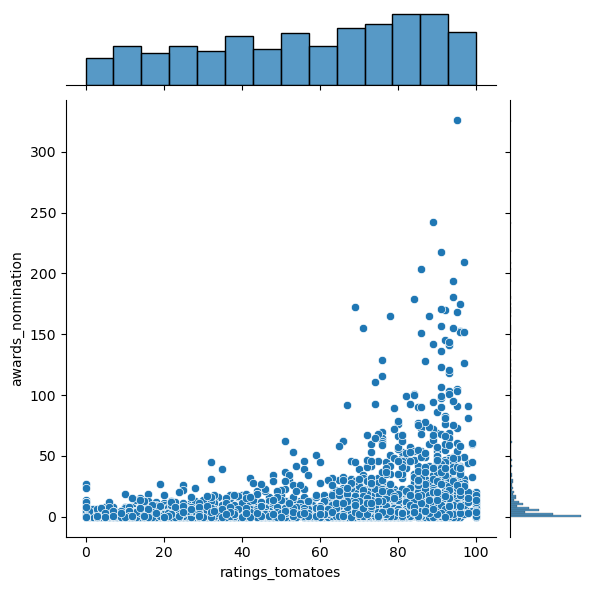

In [89]:

# Plot the relationship between the number of awards nominations and Rotten Tomatoes rating
sns.jointplot(x="ratings_tomatoes", y="awards_nomination", data=features)
plt.show()

### Plot the relationship between the number of awards nominations and Metacritic rating

Plotting the relationship between the number of awards nominations and the Metacritic rating can help us understand if there is any correlation between these two variables. This information can be useful in predicting the revenue category of a movie as high or low, as both the Metacritic rating and the number of awards nominations can be factors that affect its revenue.

For example, if we observe that movies with a higher Metacritic rating tend to have more awards nominations, then it might indicate that movies with a higher Metacritic rating have a higher probability of generating more revenue compared to movies with a lower Metacritic rating. On the other hand, if we observe that movies with a lower Metacritic rating tend to have more awards nominations, then it might indicate that movies with a lower Metacritic rating have a lower probability of generating more revenue.

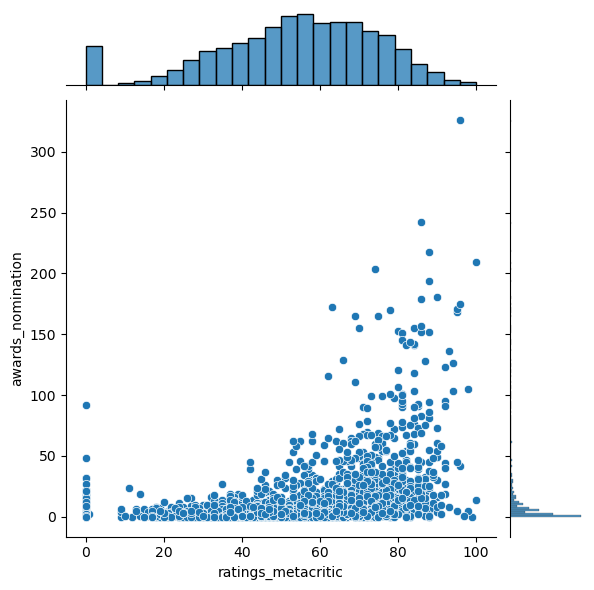

In [90]:
# Plot the relationship between the number of awards nominations and Metacritic rating
sns.jointplot(x="ratings_metacritic", y="awards_nomination", data=features)
plt.show()

In [91]:
## Training the Machine Learning Model

In [109]:
##### from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


X = features[numerical_columns]
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = RandomForestClassifier(n_estimators=500, criterion="entropy")
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8645833333333334


In [93]:
### Testing on Test Data
test_data = process_data(test)

test_data_input = test_data[numerical_columns]

In [95]:

# Fill missing values
test_data_input = test_data_input.fillna(test_data_input.mean())

revenue = clf.predict(test_data_input)

result = pd.DataFrame({'title': test_data.title, 'revenue': revenue})

with open("submission.csv", "w") as o:
    
    o.write(result.to_csv(index=False))


In [ ]:
from 